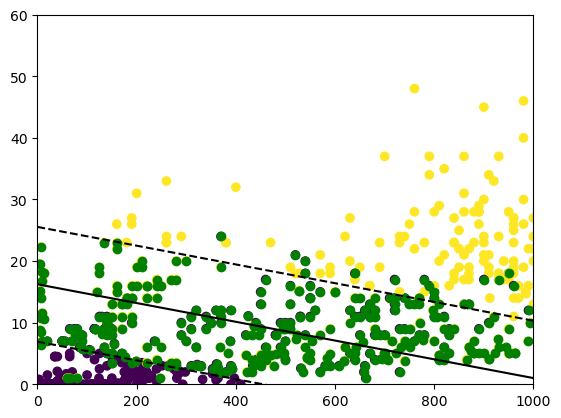

In [6]:
from sklearn.svm import SVC
import pandas as pd
import numpy as np
from sklearn.svm import SVC

df=pd.read_csv("Hamburger.csv")
df['cal_level'] = pd.qcut(df['calories'], q=3, labels=['low', 'medium', 'high'])
feature=df[["sodium","total_fat"]]
target=df["cal_level"]
target.replace({"low":0, "medium":1, "high":1}, inplace=True) 

clf = SVC(kernel="linear", C=1)       # => 이 부분만 달라짐, 나머지는 고정
clf.fit(feature, target)

w = clf.coef_[0] # 가중치값 구하기
a = -w[0] / w[1] # 기울기값 구하기
xx = np.linspace(0, 1000) # x 정의역 설정 
yy = a * xx - (clf.intercept_[0]) / w[1] # 결정 경계 완성!

# 수학적으로 결정 경계(seperating hyperplane) 주변의 서포트 벡터들은
# 거리가 np.sqrt(1 + a**2)만큼 떨어져 있음 
margin = 1 / np.sqrt(np.sum(clf.coef_**2)) # 입실론 설정 = 1/||w|| = 1/가중치 벡터의 놈(norm)
yy_down = yy - np.sqrt(1 + a**2) * margin # 아래 직선
yy_up = yy + np.sqrt(1 + a**2) * margin # 위 직선

plt.plot(xx, yy, "k-") # 결정 경계 그리기
plt.plot(xx, yy_down, "k--") # 주변 서포트 벡터1
plt.plot(xx, yy_up, "k--") # 주변 서포트 벡터2

# 데이터 점들 찍기
plt.scatter(feature["sodium"].values,feature["total_fat"].values, c=target.values)
# 서포트 벡터 머신 표시
plt.scatter(clf.support_vectors_[:, 0],clf.support_vectors_[:, 1],color="green")
plt.xlim(0, 1000)
plt.ylim(0, 60)
plt.show()

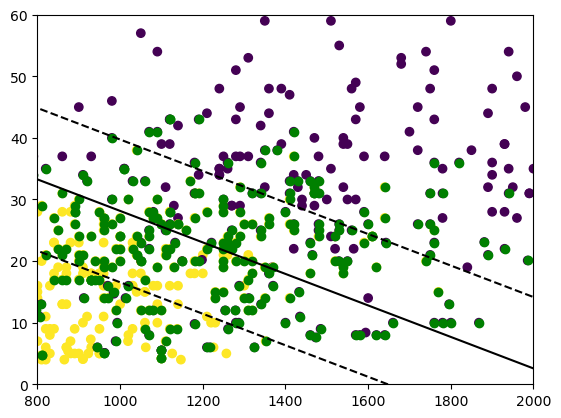

In [9]:
df=pd.read_csv("Hamburger.csv")
df['cal_level'] = pd.qcut(df['calories'], q=3, labels=['low', 'medium', 'high'])
feature=df[["sodium","total_fat"]]
target=df["cal_level"]
target.replace({"low":1, "medium":1, "high":0}, inplace=True) 

clf = SVC(kernel="linear", C=1)       # => 이 부분만 달라짐, 나머지는 고정
clf.fit(feature, target)

w = clf.coef_[0] # 가중치값 구하기
a = -w[0] / w[1] # 기울기값 구하기
xx = np.linspace(0, 2000) # x 정의역 설정 
yy = a * xx - (clf.intercept_[0]) / w[1] # 결정 경계 완성!

# 수학적으로 결정 경계(seperating hyperplane) 주변의 서포트 벡터들은
# 거리가 np.sqrt(1 + a**2)만큼 떨어져 있음 
margin = 1 / np.sqrt(np.sum(clf.coef_**2)) # 입실론 설정 = 1/||w|| = 1/가중치 벡터의 놈(norm)
yy_down = yy - np.sqrt(1 + a**2) * margin # 아래 직선
yy_up = yy + np.sqrt(1 + a**2) * margin # 위 직선

plt.plot(xx, yy, "k-") # 결정 경계 그리기
plt.plot(xx, yy_down, "k--") # 주변 서포트 벡터1
plt.plot(xx, yy_up, "k--") # 주변 서포트 벡터2

# 데이터 점들 찍기
plt.scatter(feature["sodium"].values,feature["total_fat"].values, c=target.values)
# 서포트 벡터 머신 표시
plt.scatter(clf.support_vectors_[:, 0],clf.support_vectors_[:, 1],color="green")
plt.xlim(800, 2000)
plt.ylim(0, 60)
plt.show()